In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [32]:
import os

os.chdir(r"C:\Users\Jenni\OneDrive\Escritorio\EDA_Guerra_de_consolas\data")

In [33]:
df = pd.read_csv("videojuegos_vendidos_limpio.csv", sep = ";")
display(df)

,Unnamed: 0,Name,Platform_norm,Year,developer,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Generation,Console_Type,Company
0,0,'98 Koshien,PlayStation,1998,Magical Company,0.40,0.15,0.10,0.12,0.03,5th Gen,Home Console,Sony
1,1,.hack//G.U. Last Recode,PlayStation 4,2017,CyberConnect2,0.25,0.10,0.04,0.08,0.03,8th Gen,Home Console,Sony
2,2,.hack//G.U. Vol.1//Rebirth,PlayStation 2,2006,CyberConnect2,0.17,0.00,0.00,0.17,0.00,6th Gen,Home Console,Sony
3,3,.hack//G.U. Vol.2//Reminisce,PlayStation 2,2007,CyberConnect2,0.23,0.11,0.09,0.00,0.03,6th Gen,Home Console,Sony
4,4,.hack//G.U. Vol.2//Reminisce (jp sales),PlayStation 2,2007,CyberConnect2,0.16,0.00,0.00,0.16,0.00,6th Gen,Home Console,Sony
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17456,17456,uDraw Studio: Instant Artist,PlayStation 3,2011,Unknown,0.00,0.00,0.00,0.00,0.00,7th Gen,Home Console,Sony
17457,17457,uDraw Studio: Instant Artist,Wii,2011,THQ,0.17,0.06,0.09,0.00,0.02,7th Gen,Home Console,Nintendo
17458,17458,uDraw Studio: Instant Artist,Xbox 360,2011,THQ,0.02,0.01,0.01,0.00,0.00,7th Gen,Home Console,Microsoft
17459,17459,¬°Shin Chan Flipa en colores!,Nintendo DS,2007,Inti Creates,0.14,0.00,0.00,0.14,0.00,7th Gen,Handheld,Nintendo


In [34]:
columna_eu_sales = df[['Name', 'Year', 'developer', 'EU_Sales', 'Generation', 'Console_Type', 'Company']]

In [35]:
display(columna_eu_sales)


,Name,Year,developer,EU_Sales,Generation,Console_Type,Company
0,'98 Koshien,1998,Magical Company,0.10,5th Gen,Home Console,Sony
1,.hack//G.U. Last Recode,2017,CyberConnect2,0.04,8th Gen,Home Console,Sony
2,.hack//G.U. Vol.1//Rebirth,2006,CyberConnect2,0.00,6th Gen,Home Console,Sony
3,.hack//G.U. Vol.2//Reminisce,2007,CyberConnect2,0.09,6th Gen,Home Console,Sony
4,.hack//G.U. Vol.2//Reminisce (jp sales),2007,CyberConnect2,0.00,6th Gen,Home Console,Sony
...,...,...,...,...,...,...,...
17456,uDraw Studio: Instant Artist,2011,Unknown,0.00,7th Gen,Home Console,Sony
17457,uDraw Studio: Instant Artist,2011,THQ,0.09,7th Gen,Home Console,Nintendo
17458,uDraw Studio: Instant Artist,2011,THQ,0.01,7th Gen,Home Console,Microsoft
17459,¬°Shin Chan Flipa en colores!,2007,Inti Creates,0.00,7th Gen,Handheld,Nintendo


In [36]:
euroventas_positivas = columna_eu_sales['EU_Sales'] > 0

df_filtrado_eu = columna_eu_sales[euroventas_positivas]



In [37]:
display(df_filtrado_eu)

,Name,Year,developer,EU_Sales,Generation,Console_Type,Company
0,'98 Koshien,1998,Magical Company,0.10,5th Gen,Home Console,Sony
1,.hack//G.U. Last Recode,2017,CyberConnect2,0.04,8th Gen,Home Console,Sony
3,.hack//G.U. Vol.2//Reminisce,2007,CyberConnect2,0.09,6th Gen,Home Console,Sony
6,.hack//Infection Part 1,2003,CyberConnect2,0.38,6th Gen,Home Console,Sony
8,.hack//Mutation Part 2,2003,CyberConnect2,0.18,6th Gen,Home Console,Sony
...,...,...,...,...,...,...,...
17443,pro evolution soccer 2011,2010,NaN,0.10,7th Gen,Home Console,Nintendo
17444,pro evolution soccer 2011,2010,NaN,0.44,7th Gen,Home Console,Microsoft
17455,uDraw Studio,2010,"Pipeworks Software, Inc.",0.58,7th Gen,Home Console,Nintendo
17457,uDraw Studio: Instant Artist,2011,THQ,0.09,7th Gen,Home Console,Nintendo


In [38]:
#Ventas por generacion en Europa


ventas_por_generacion = columna_eu_sales.groupby('Generation')['EU_Sales'].sum()

display(ventas_por_generacion)

Generation
5th Gen     258.97
6th Gen     523.09
7th Gen    1145.82
8th Gen     476.92
Name: EU_Sales, dtype: float64

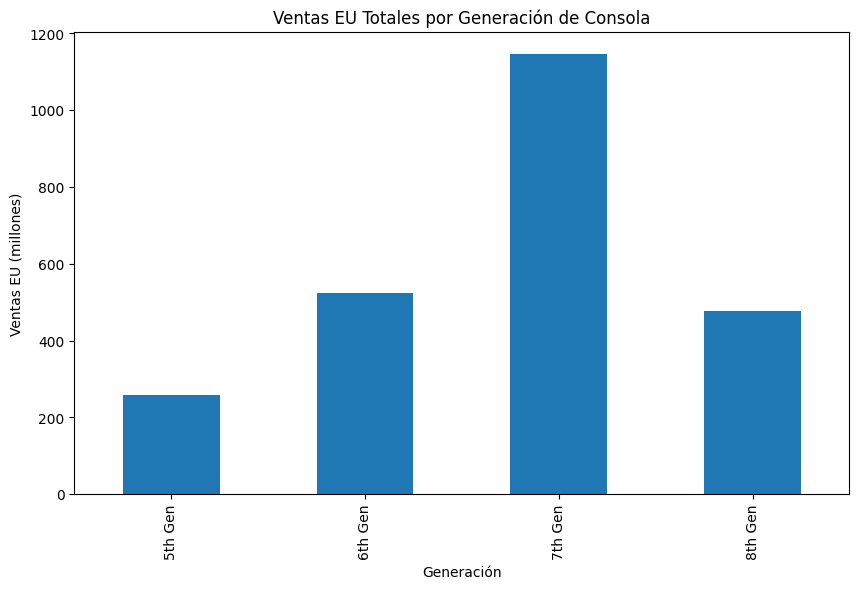

In [39]:
ventas_por_generacion.plot(kind='bar', figsize=(10, 6))

plt.title('Ventas EU Totales por Generación de Consola')
plt.xlabel('Generación')
plt.ylabel('Ventas EU (millones)')

plt.show()

In [40]:
#vebntas por empresa en Europa

ventas_por_empresa = columna_eu_sales.groupby('Company')['EU_Sales'].sum()

display(ventas_por_empresa)

Company
Microsoft     446.22
Nintendo      663.05
Sony         1295.53
Name: EU_Sales, dtype: float64

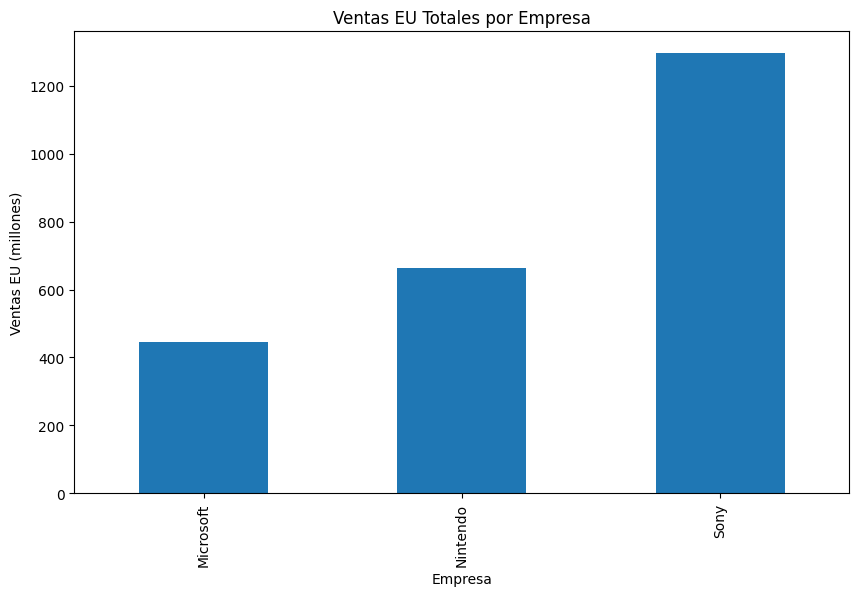

In [41]:
ventas_por_empresa.plot(kind='bar', figsize=(10, 6))

plt.title('Ventas EU Totales por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Ventas EU (millones)')

plt.show()

In [42]:
#Ventas por tipo de consola en Europa
ventas_por_tipo_consola = columna_eu_sales.groupby('Console_Type')['EU_Sales'].sum()
display(ventas_por_tipo_consola)

Console_Type
Handheld         360.22
Home Console    2032.95
Hybrid            11.63
Name: EU_Sales, dtype: float64

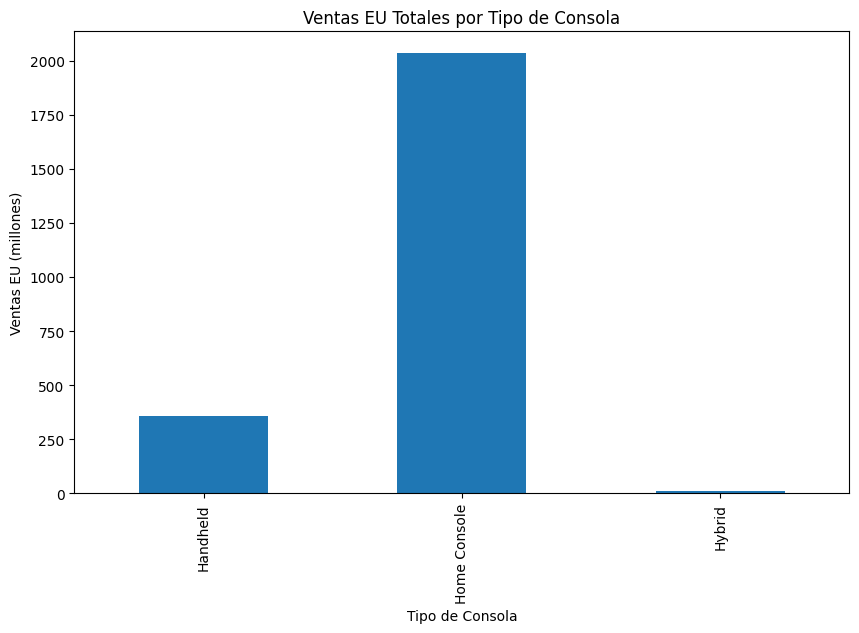

In [43]:
ventas_por_tipo_consola.plot(kind='bar', figsize=(10, 6))

plt.title('Ventas EU Totales por Tipo de Consola')
plt.xlabel('Tipo de Consola')
plt.ylabel('Ventas EU (millones)')

plt.show()

Year
1994      0.17
1995      7.76
1996     31.98
1997     40.18
1998     50.26
1999     63.54
2000     55.09
2001     77.73
2002     87.42
2003     94.47
2004     81.70
2005    117.28
2006    128.99
2007    156.74
2008    186.68
2009    187.16
2010    175.09
2011    165.62
2012    129.47
2013    131.68
2014    134.70
2015    101.61
2016     80.91
2017     70.04
2018     48.20
2019      0.06
2020      0.27
Name: EU_Sales, dtype: float64

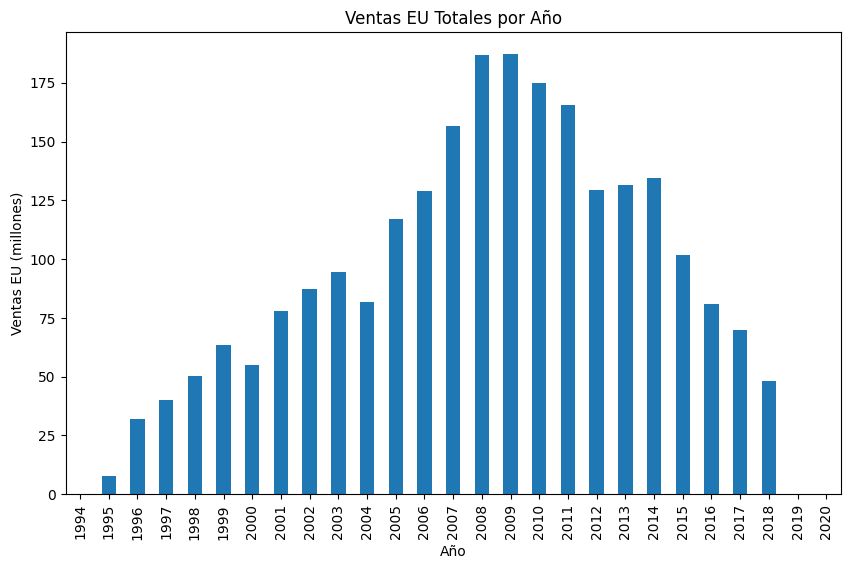

In [44]:
#Ventas por año en Europa
ventas_por_ano = columna_eu_sales.groupby('Year')['EU_Sales'].sum()
display(ventas_por_ano)
ventas_por_ano.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas EU Totales por Año')
plt.xlabel('Año')       
plt.ylabel('Ventas EU (millones)')
plt.show()

Generation,5th Gen,6th Gen,7th Gen,8th Gen
Year,,,,
1994,0.17,NaN,NaN,NaN
1995,7.76,NaN,NaN,NaN
1996,31.98,NaN,NaN,NaN
1997,40.18,NaN,NaN,NaN
1998,50.26,NaN,NaN,NaN
1999,63.54,NaN,NaN,NaN
2000,46.61,8.48,NaN,NaN
2001,15.72,62.01,NaN,NaN
2002,1.86,85.56,NaN,NaN


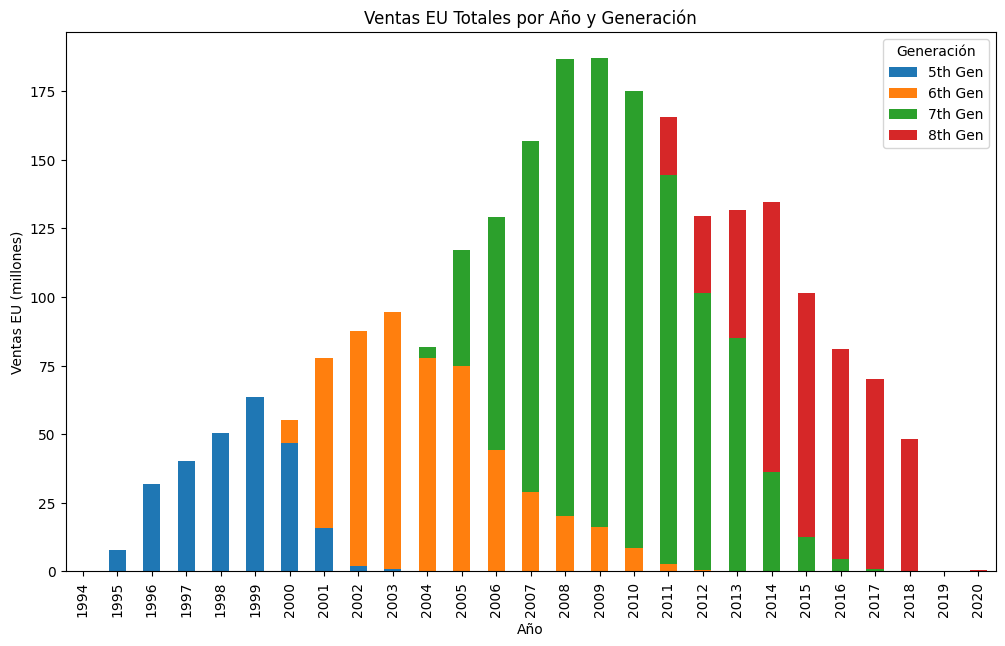

In [45]:
#Ventas por año y generación en Europa
ventas_ano_generacion = columna_eu_sales.groupby(['Year', 'Generation'])['EU_Sales'].sum().unstack()
display(ventas_ano_generacion)
ventas_ano_generacion.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Ventas EU Totales por Año y Generación') 
plt.xlabel('Año')
plt.ylabel('Ventas EU (millones)')
plt.legend(title='Generación')
plt.show()